<a href="https://colab.research.google.com/github/VDidyk/AI/blob/master/module2/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/weatherHistory.csv")

In [21]:
#df.shape
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Завдання 1
Виведіть основні числові характеристики для числових ознак. Що потрібно зробити з стовпчиком `Loud Cover`?

In [ ]:
print(df.describe(include='number'))

#Lound Cover потрібно видалити тому що не містить жодної цінної інформації.

       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   


# Завдання 2
Подивіться на отриману таблицю, особливо на характеристики `min` та `max`, для яких ознак потрібно побудувати ящики з вусами в першу чергу? Для решти намалюйте гістограми.


KeyboardInterrupt: 

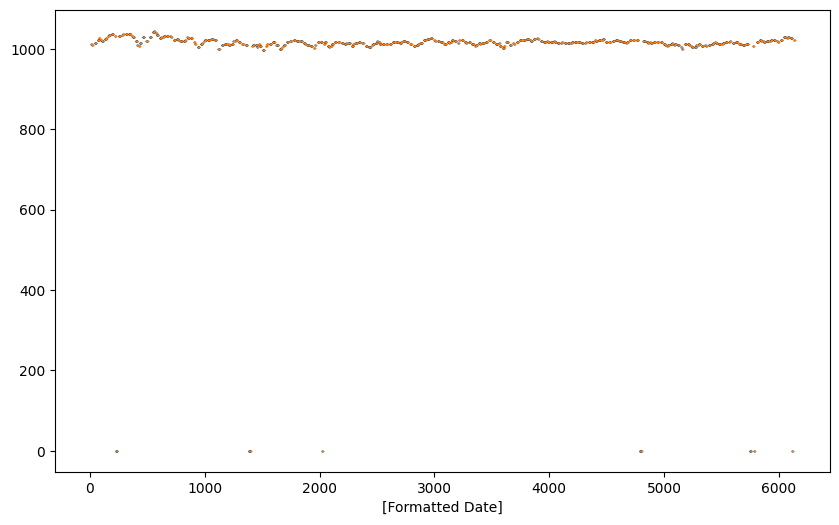

In [26]:
df[["Formatted Date", "Pressure (millibars)"]].boxplot(by='Formatted Date', figsize=(10,6))

In [27]:
for column_name in df.columns:
    if df[column_name].dtype == 'float64' and column_name != "Pressure (millibars)":
        df.hist(column=column_name, by="Formatted Date")

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f8fea414ee0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f8fea414160> (for post_execute):


KeyboardInterrupt: 

# Завдання 3
Чи потрібно застосувати квантильний алгоритм для видалення викидів? Якщо так то застосуйте, інакше, що на вашу думку потрібно зробити?

In [16]:
q1 = df.quantile(q=0.25)
q3 = df.quantile(q=0.75)

iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

mask = ((df >= lower) & (df <= upper)).any()

df = df.loc[:,mask]

df

<ipython-input-16-f624752e0204>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(q=0.25)
<ipython-input-16-f624752e0204>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(q=0.75)
<ipython-input-16-f624752e0204>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ((df >= lower) & (df <= upper)).any()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


# Завдання 4
Намалюйте матрицю кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму

<ipython-input-22-f8274ddceb01>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


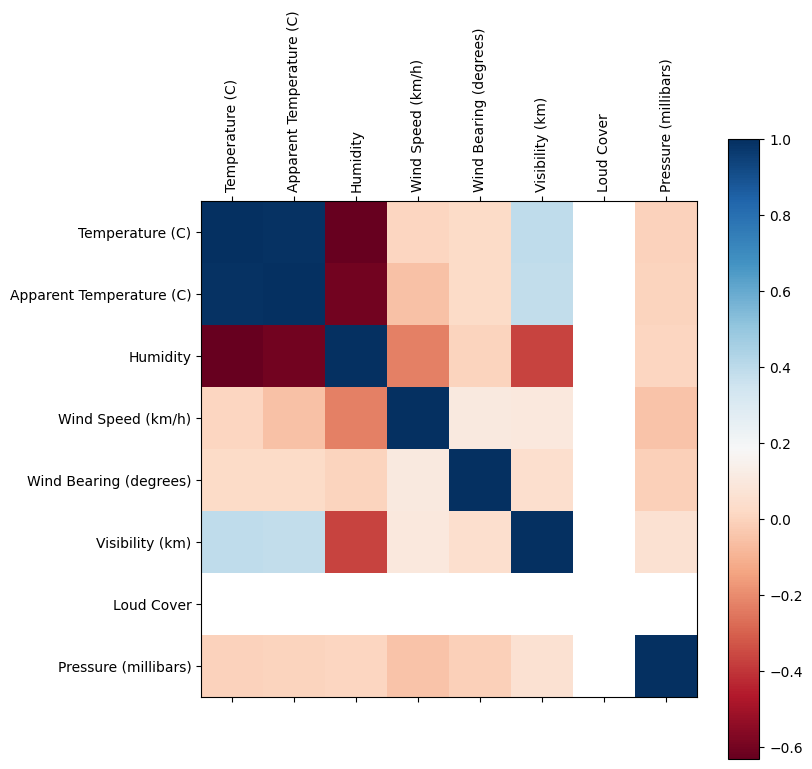

In [22]:
corr = df.corr(method='pearson')

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

<Axes: xlabel='Visibility (km)', ylabel='Humidity'>

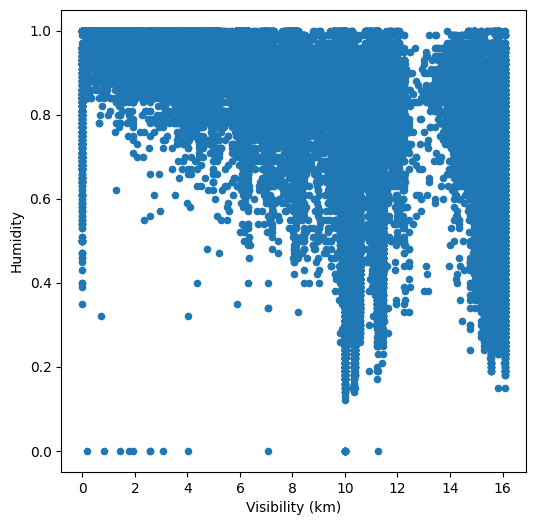

In [24]:
df.plot(kind='scatter', x='Visibility (km)', y='Humidity', figsize=(6,6))

# Завдання 5
Виведіть характеристики для категоріальних ознак

In [31]:
df.describe(include='object')


,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


# Завдання 6
Виведіть групові ящики з вусами по одній(або декількох) категоріальних ознак. Що по них можна сказати?

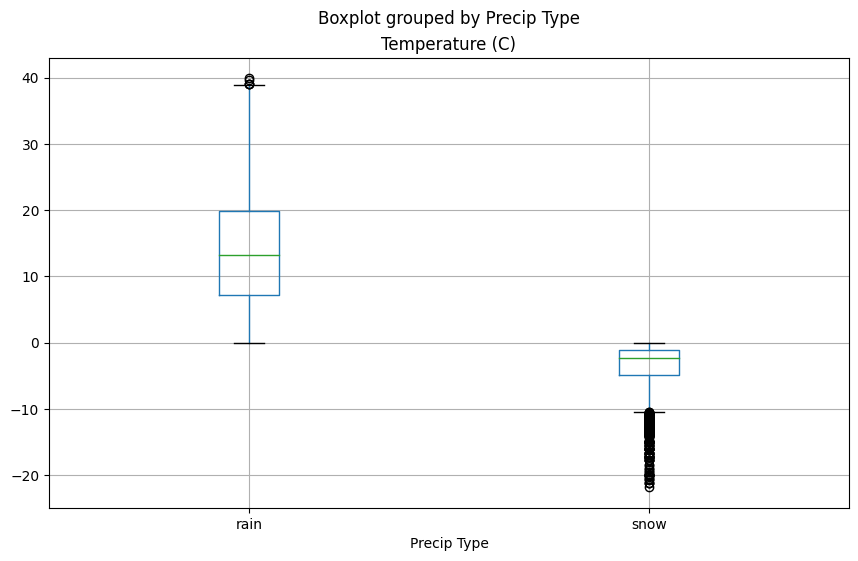

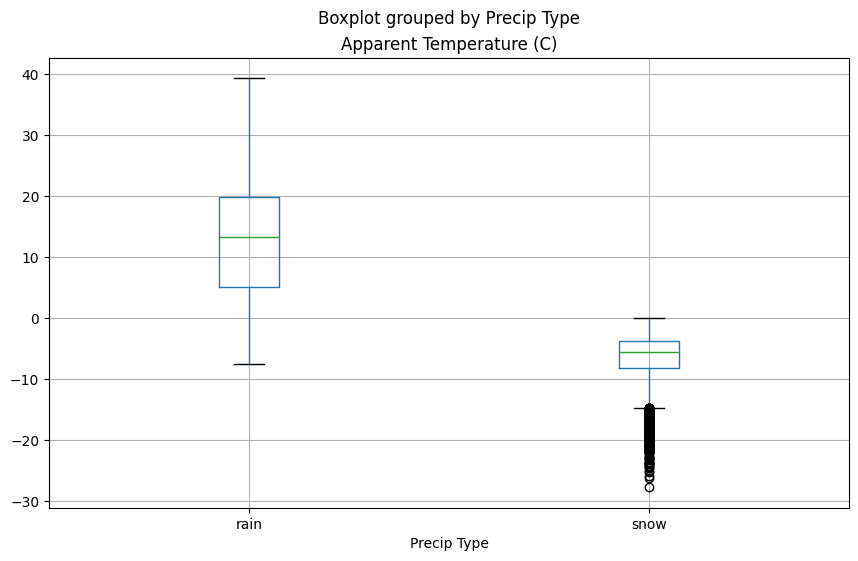

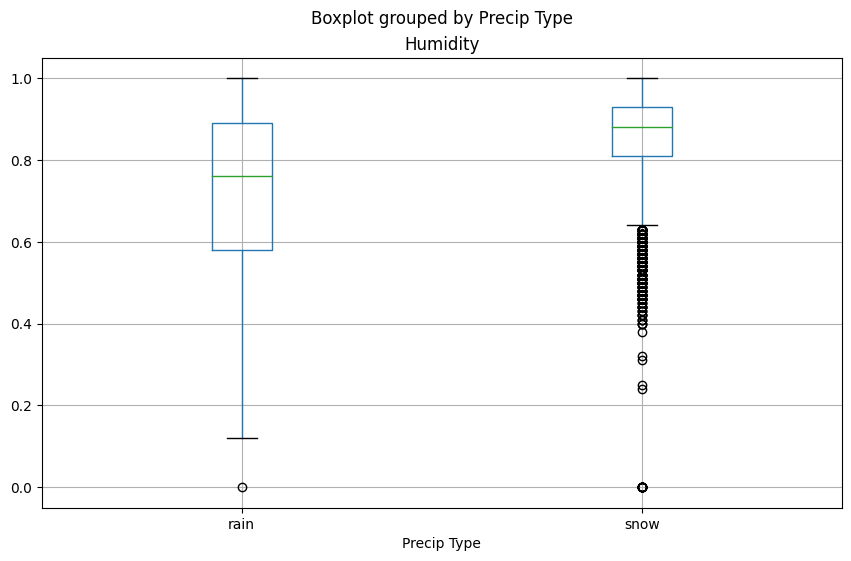

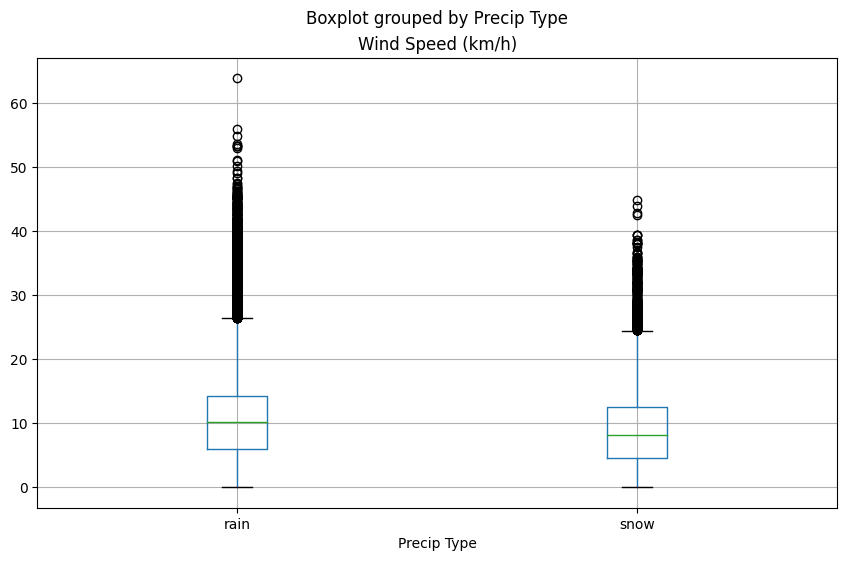

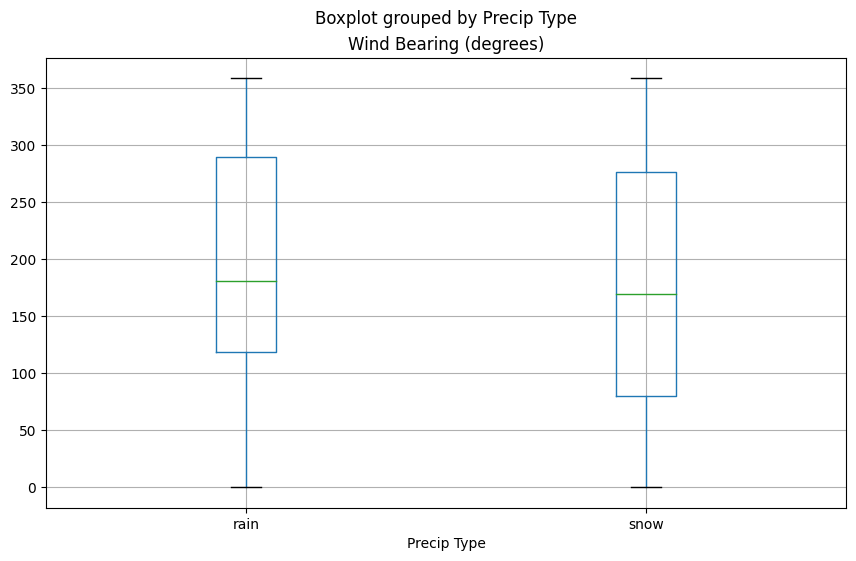

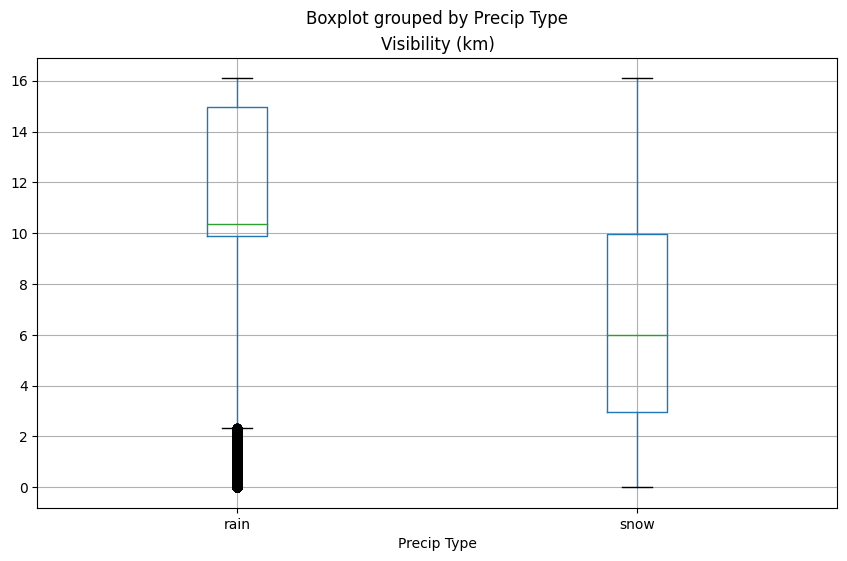

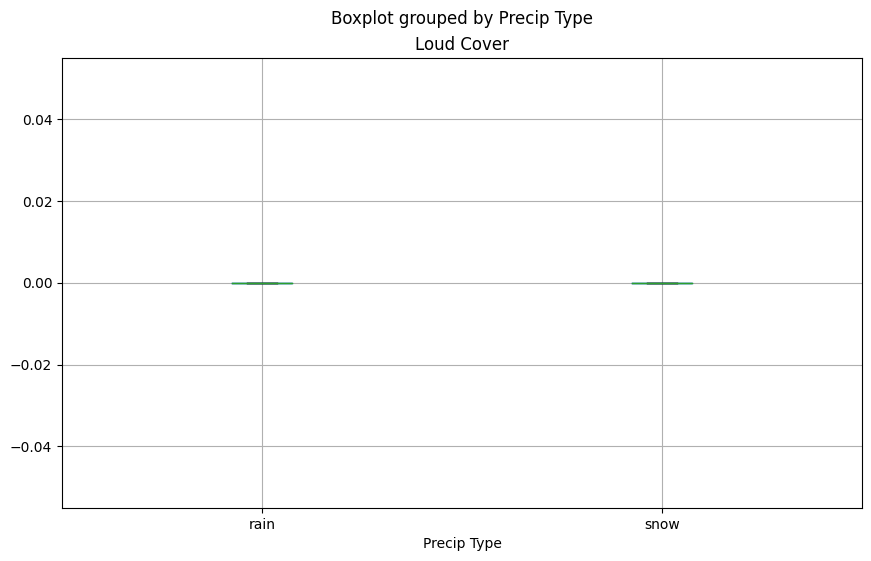

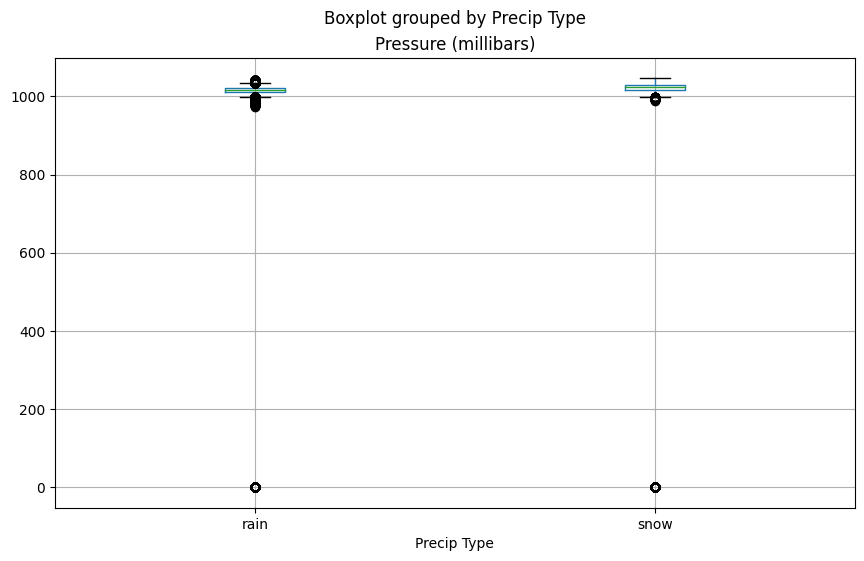

In [33]:
for column_name in df.columns:
    if df[column_name].dtype == 'float64':
        df.boxplot(column=column_name, by='Precip Type', figsize=(10,6))